Pay_pattern 에 따른 어떠한 상관 관계가 있는지 파악해봐야겠다.

일변량 비시각화
- 요약 통계량 : describe()
    - unique: 범주의 수
    - freq: 최빈값이 존재하는 개수
    - top: 최빈값

다변량 비시각화
- 상관계수: corr()
- 교차표: crosstab(): 두 범주형 데이터의 상관관계를 확인할 때

일변량 시각화
- 선 그래프 (시간/순서에 따른 데이터 연속 변화량 관찰)
- 막대 그래프 (범주에 대한 통계 데이터의 양을 막대로 표현)
- 파이 그래프 (전체에 대한 각 부분의 비율)
- 히스토그램 (특정 데이터의 빈도수를 막대 모양으로 표시) (데이터 특성/분포, 빈도, 빈도밀도, 확률)
- 상자 그래프 (수치적 요약 통계 자료를 시각화 : 이상치, 최댓값, 제 3사분위수, 중앙값, 제 1사분위수, 최소값)

다변량 시각화
- 산점도: 2개의 연속형 변수의 관계를 보기 위해 X축과 Y축에 표시하는 점들을 찍어 만드는 그래프 (상관관계를 대략적으로 파악)
- 히트맵: corr(), pcolor(), colorbar(), 칼럼 간의 상관관계
- 범주형 산점도(Categorical Plot): catplot(), 범주형 데이터와 수치형 데이터의 관계
- 선형 회귀 모델 그래프: lmplot(), 특성간의 선형적인 관계 파악 또한 이상치 데이터도 짐작 가능
- 빈도 그래프(count plot): sns.countplot(), 범주형 데이터에 대해 항목별 개수를 세어서 막대 그래프를 그림
- 조인트 그래프(joint plot): sns.jointplot(), 중앙에 산점도와 가장자리에 히스토그램을 동시에 그림, 데이터의 분포와 상관 관계

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\hyssk\AICE_\Dacon_DataAnlysis\train.csv')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


target이 0인 데이터프레임과 target이 1인 데이터프레임

In [3]:
df.drop(['user_id'],axis=1,inplace=True)

In [4]:
df_target_0=df[df['target']==0]
df_target_1=df[df['target']==1]
df_target_1


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
6,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,11,6,11.187836,88.757610,6,9,77.335911,5,4,High,Basic,1,4,1
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1


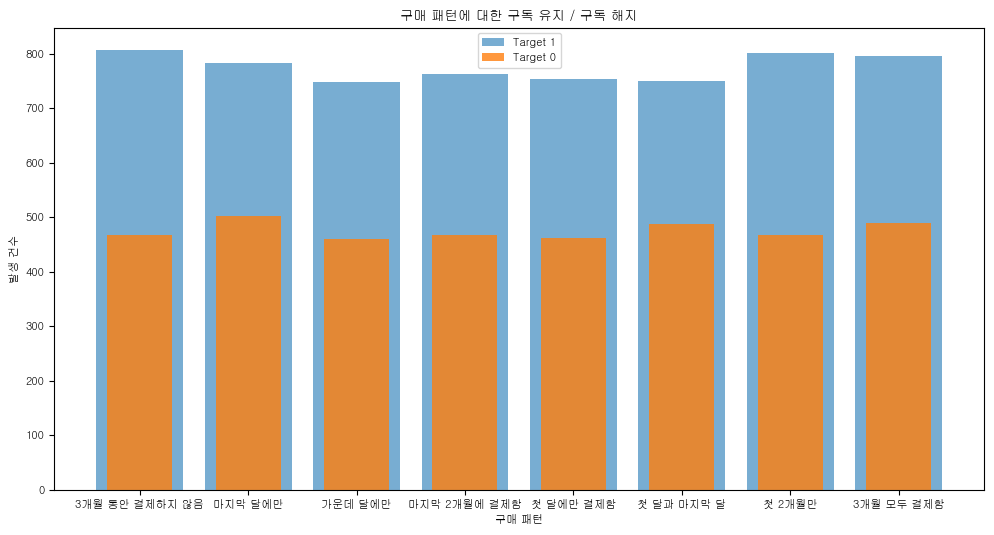

In [5]:
payment_pattern_1=df_target_1.groupby("payment_pattern").count().loc[[0,1,2,3,4,5,6,7],'target']
payment_pattern_0=df_target_0.groupby("payment_pattern").count().loc[[0,1,2,3,4,5,6,7],'target']

x=np.arange(0,8,1)
payment_pattern_list=['3개월 동안 결제하지 않음','마지막 달에만','가운데 달에만','마지막 2개월에 결제함',
         '첫 달에만 결제함','첫 달과 마지막 달','첫 2개월만','3개월 모두 결제함']
from matplotlib import font_manager, rc
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize=(12,6))
plt.rc('font', size=8) 
plt.bar(x,payment_pattern_1,alpha=0.6,label='Target 1')
plt.bar(payment_pattern_list,payment_pattern_0,alpha=0.8,label='Target 0',width=0.6)
plt.xlabel("구매 패턴")
plt.ylabel("발생 건수")
plt.title("구매 패턴에 대한 구독 유지 / 구독 해지")
plt.legend()

특징을 잘 모르겠다.

구매 패턴이 다르다고 해서 구독을 더 한다든가라는 관계를 파악하기 어렵다.

이상치 탐지에 대한 탐구

In [8]:
dtype_numerical_column = list(df.columns)
dtype_numerical_column.remove('subscription_type')
dtype_numerical_column.remove('payment_pattern')
dtype_numerical_column.remove('preferred_difficulty_level')
dtype_numerical_column.remove('target')
dtype_numerical_column

['subscription_duration',
 'recent_login_time',
 'average_login_time',
 'average_time_per_learning_session',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'abandoned_learning_sessions',
 'community_engagement_level',
 'customer_inquiry_history']

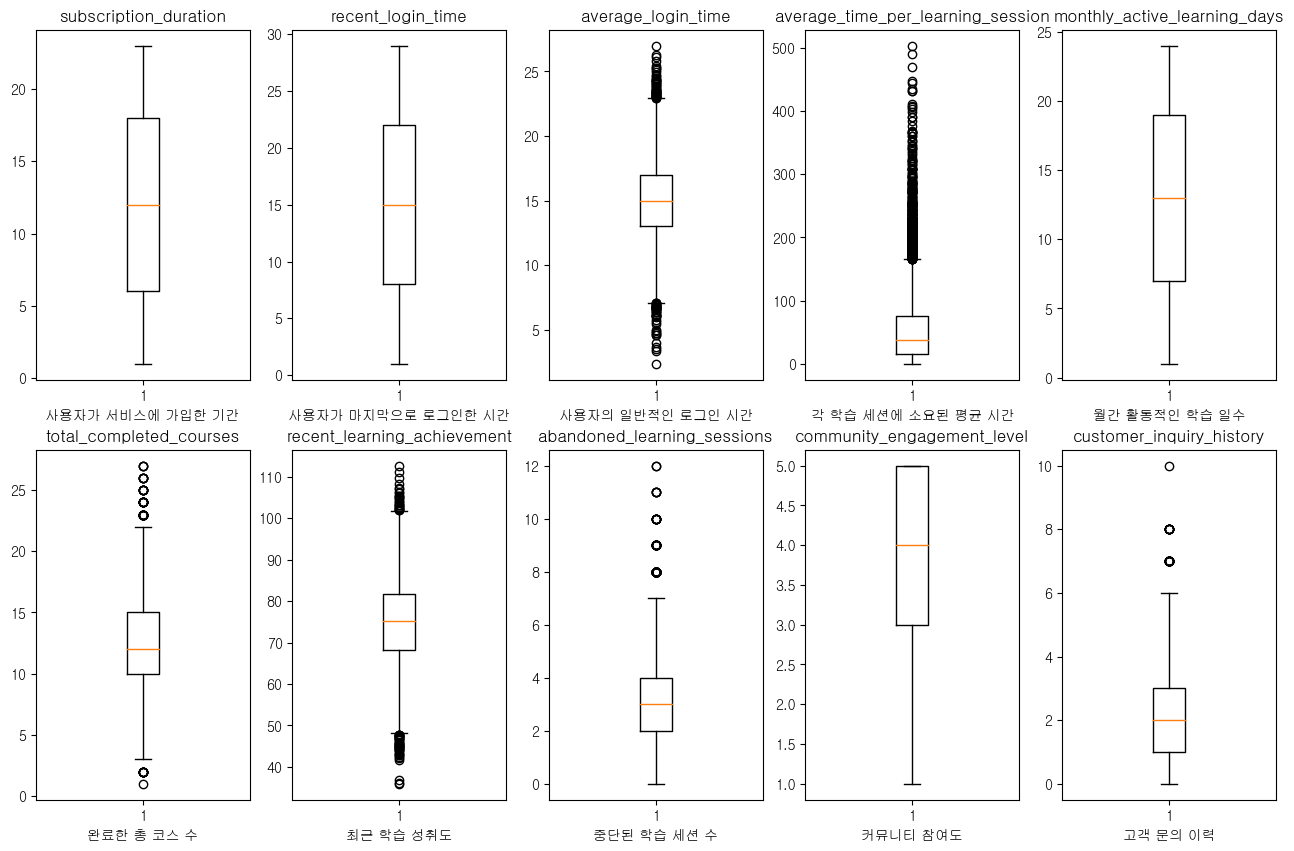

In [9]:
plt.figure(figsize=(16,10))
kor_column=['사용자가 서비스에 가입한 기간','사용자가 마지막으로 로그인한 시간','사용자의 일반적인 로그인 시간','각 학습 세션에 소요된 평균 시간',
        '월간 활동적인 학습 일수','완료한 총 코스 수','최근 학습 성취도','중단된 학습 세션 수','커뮤니티 참여도','고객 문의 이력']
nrows,ncols=2,5
columns=dtype_numerical_column
for index,column in enumerate(columns):
    plt.subplot(nrows,ncols,index+1)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel(column.replace(column,kor_column[index]))

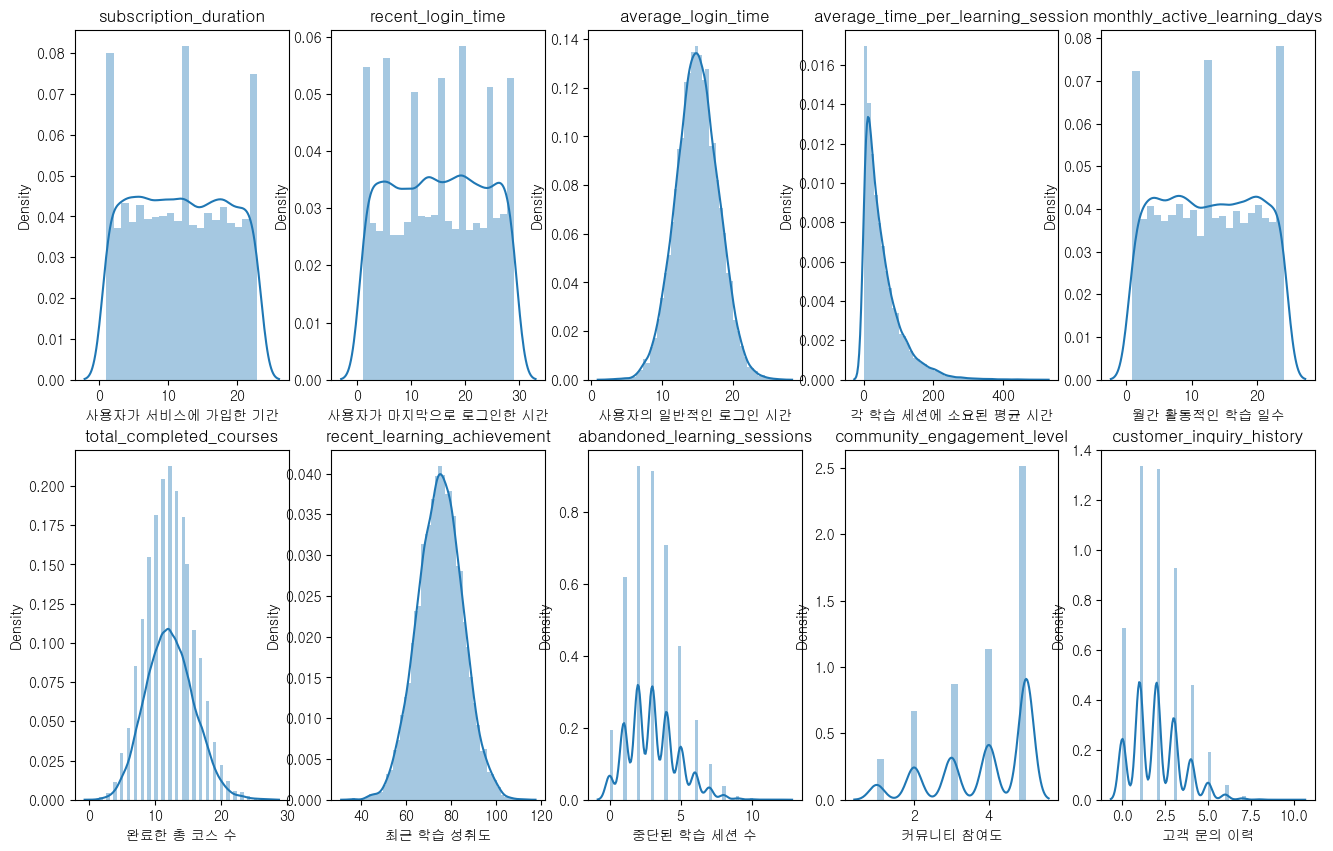

In [10]:
kor_column=['사용자가 서비스에 가입한 기간','사용자가 마지막으로 로그인한 시간','사용자의 일반적인 로그인 시간','각 학습 세션에 소요된 평균 시간',
        '월간 활동적인 학습 일수','완료한 총 코스 수','최근 학습 성취도','중단된 학습 세션 수','커뮤니티 참여도','고객 문의 이력']
plt.figure(figsize=(16,10))
dtype_numerical_column
for index,column in enumerate(columns):
    plt.subplot(nrows,ncols,index+1)
    sns.distplot(df[column])
    plt.title(column)
    plt.xlabel(column.replace(column,kor_column[index]))

Skewness: 데이터 분포의 좌우 비대칭도를 표현하는 척도

skewness가 심한 것은 `각 학습 세션에 소요된 평균 시간`, `커뮤니티 참여도`

In [11]:
df['average_time_per_learning_session'].describe()

count    10000.000000
mean        54.917720
std         56.024310
min          0.011515
25%         15.276611
50%         37.578818
75%         75.584200
max        503.372616
Name: average_time_per_learning_session, dtype: float64

각 학습 세션에 소요된 평균 시간의 Spectrum이 크다.

평균은 54분 인데, min은 0분, max는 500분 가까이에 있어서 더 탐구해볼 필요가 있겠다.

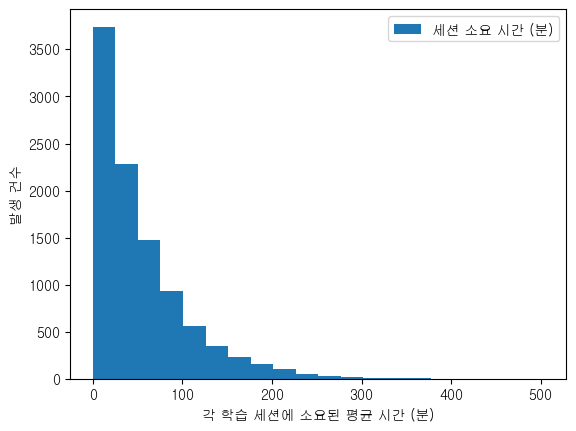

In [12]:
plt.figure()
plt.hist(df['average_time_per_learning_session'],20,label='세션 소요 시간 (분)')
plt.legend()
plt.xlabel("각 학습 세션에 소요된 평균 시간 (분)")
plt.ylabel("발생 건수")
plt.show()

그럼 각 학습 세션에 소요된 평균 시간이 많으면, target에 영향을 끼칠까?

<Figure size 640x480 with 0 Axes>

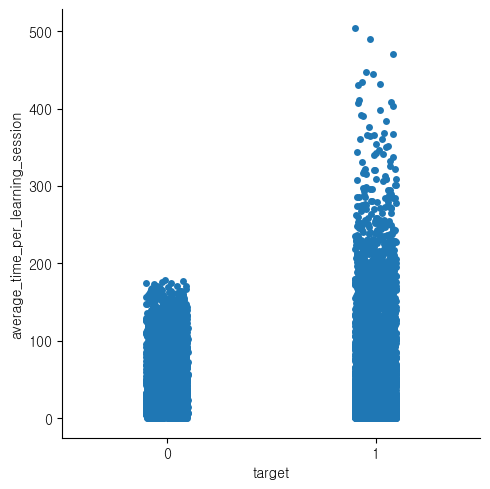

In [13]:
plt.figure()
sns.catplot(y='average_time_per_learning_session',x='target',data=df)
plt.show()

average_time_per_learning_session (각 학습 세션에 소요된 평균 시간 (분))이 200분을 넘어가는 사람들은 모두 구독을 유지했다.

어느 정도 각 학습세션에 소요된 평균시간이 많은 사람들은 구독을 유지했다고 판단할 수 있다.

반면, 200 분 이하의 사람들은, 구독유지와 상관없는 모습을 보인다.

`커뮤니티 참여도` 에 따른 target 분포를 살펴보자


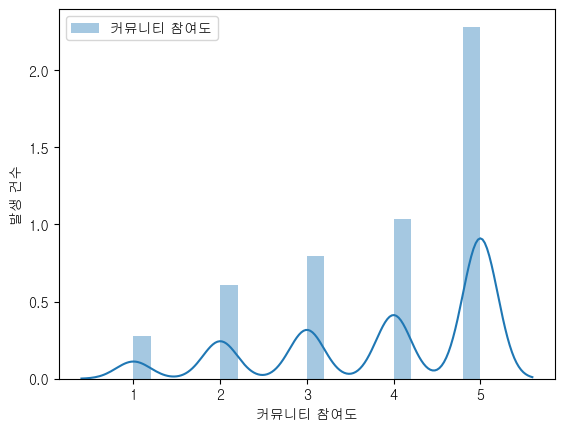

In [25]:
plt.figure()
sns.distplot(df['community_engagement_level'],20,label='커뮤니티 참여도')
plt.legend()
plt.xlabel("커뮤니티 참여도")
plt.ylabel("발생 건수")
plt.show()

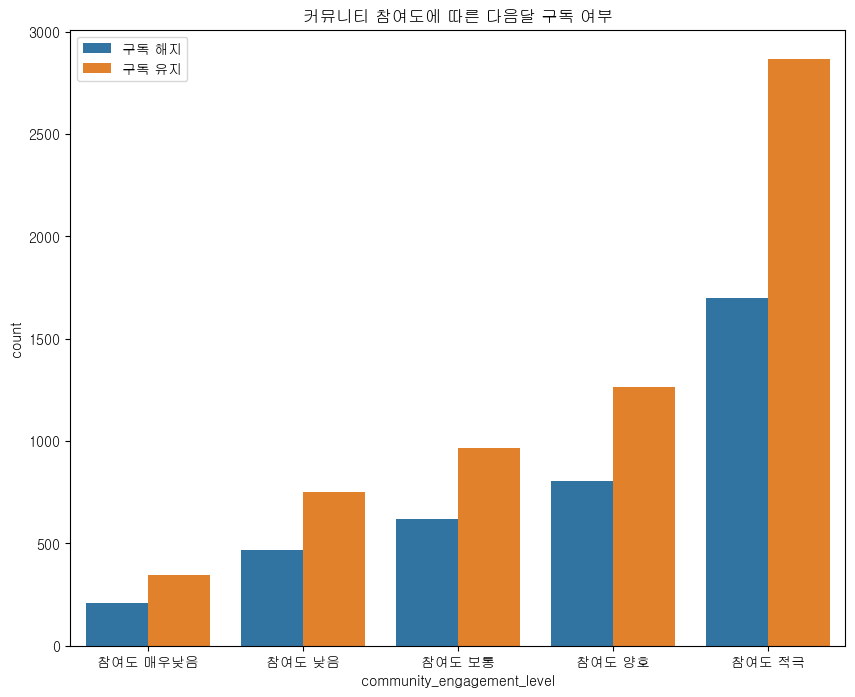

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(x='community_engagement_level',hue='target',data=df)
plt.xticks(np.arange(0,5,1),labels=['참여도 매우낮음','참여도 낮음','참여도 보통','참여도 양호','참여도 적극'])
plt.legend(['구독 해지','구독 유지'])
plt.title('커뮤니티 참여도에 따른 다음달 구독 여부')
plt.show()

참여도가 높은 사람이 구독도 많이 한 걸 볼 수 있지만, 그만큼 구독도 많이 안하시긴 하였다.

이 column이 학습에 유의미한 feature가 될 수 있는지의 판단 근거를 어떤 식으로 찾아야 할까..

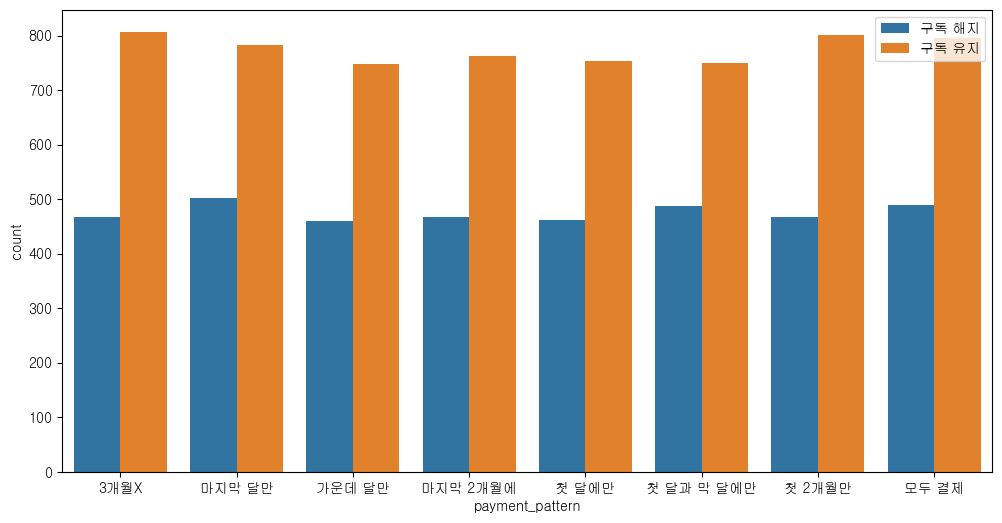

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='payment_pattern',hue='target')
plt.legend(['구독 해지','구독 유지'])
plt.xticks(np.arange(0,8,1),labels=['3개월X','마지막 달만','가운데 달만','마지막 2개월에','첫 달에만','첫 달과 막 달에만','첫 2개월만','모두 결제'])
plt.show()

결제 패턴에 관련없이 일정한 패턴을 보여준다.

feature에서 제거 해도 되지 않을까 싶다

In [15]:
pd.crosstab(df['payment_pattern'],df['target']) 

target,0,1
payment_pattern,,
0,468,807
1,502,783
2,459,747
3,467,763
4,461,753
5,488,750
6,467,801
7,489,795
